In [1]:
# Nice trick to automatically reload some pacakges
%load_ext autoreload

In [2]:
import warnings
warnings.filterwarnings('ignore')

import ROOT
import hepplotting as plt

Welcome to ROOTaaS 6.06/08

Applying ATLAS style settings...



In [3]:
# Tell autoreload which package to reload
%autoreload 1
%aimport hepplotting
counter = -1

In [4]:
bkg_name = ['bkg1','bkg2','bkg3']

bkg_legname = {
    'bkg1': 'Bkg_{1} (m_{#chi}=10 GeV)',
    'bkg2': 'Bkg^{2}'                  ,
    'bkg3': 'Bkg_{3} #alpha=1/137'     ,
}

bkg_color = {
    'bkg1' : 868,
    'bkg2' : 867,
    'bkg3' : 866,
}

def get_random_histo(name):
    global counter
    h=ROOT.TH1F(name,name,50,-5,10)
    h.FillRandom('gaus')
    h.SetName(h.GetName()+'_tmp{}'.format(counter))
    counter+=1
    return h

dictBkg= {b:[get_random_histo(b),bkg_color[b],bkg_legname[b]] for b in bkg_name}
hData  = plt.sum_histograms([get_random_histo('Data') for i in range(0,3)])
hTot   = plt.sum_histograms( [v[0] for v in dictBkg.values()] )

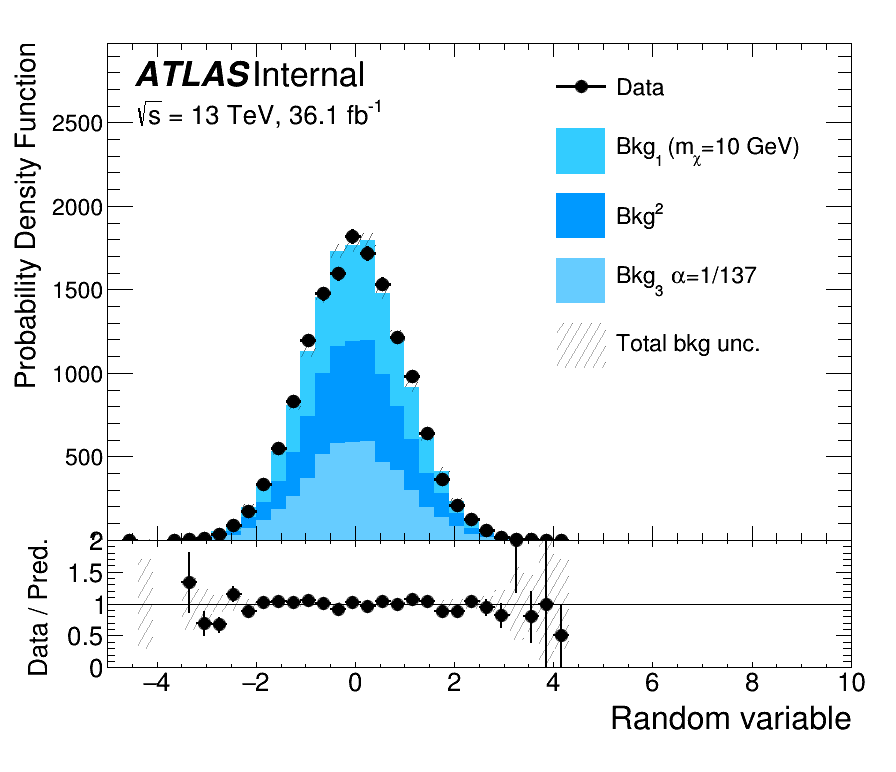

Info in <TCanvas::Print>: pdf file plots/Example_plot_Internal.pdf has been created
Info in <TCanvas::Print>: png file plots/Example_plot_Internal.png has been created
Info in <TCanvas::SaveAs>: ROOT file plots/Example_plot_Internal.root has been created


In [5]:
plt.make_nice_canvas(dictBkg,hTot,hData,plot_name='Example_plot',
                     ytitle='Probability Density Function',
                     xtitle='Random variable',
                    )